   Unnamed: 0                                filename  age  gender   race  \
0           0  100_0_0_20170112213500903.jpg.chip.jpg  100    male  white   
1           1  100_0_0_20170112215240346.jpg.chip.jpg  100    male  white   
2           2  100_1_0_20170110183726390.jpg.chip.jpg  100  female  white   
3           3  100_1_0_20170112213001988.jpg.chip.jpg  100  female  white   
4           4  100_1_0_20170112213303693.jpg.chip.jpg  100  female  white   

  age_range  num_haircuts_life has_tiktok remembers_disco uses_skincare  \
0   100-119                360         no              no            no   
1   100-119                627         no              no            no   
2   100-119                687         no             yes            no   
3   100-119                710         no              no            no   
4   100-119                614         no              no            no   

   max_annual_earnings  
0         32890.160162  
1         29870.803247  
2         6

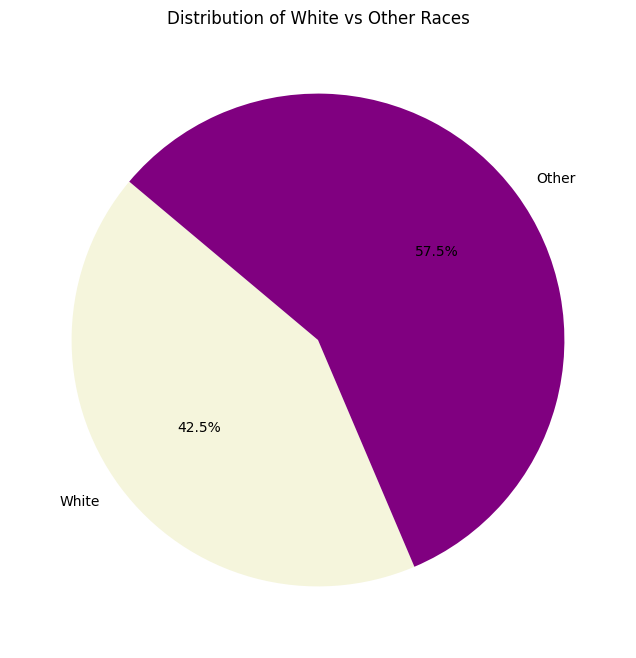

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import torch
import matplotlib.pyplot as plt

df = pd.read_csv('UTKFaceAugmented.csv')


print(df.head())


categorical_features = ['gender', 'race', 'age_range', 'has_tiktok', 'remembers_disco', 'uses_skincare']
numerical_features = ['num_haircuts_life', 'max_annual_earnings']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


x = df.drop(['filename', 'age'], axis=1)
y = df['age']
x_processed = preprocessor.fit_transform(x)


x_tensor = torch.tensor(x_processed, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)


x_train, x_val, y_train, y_val = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)


torch.save((x_train, y_train), 'train_data.pt')
torch.save((x_val, y_val), 'val_data.pt')

race_counts = df['race'].value_counts()
race_labels = race_counts.index
race_sizes = race_counts.values

white_count = race_counts.get('white', 0)
other_count = sum(race_counts) - white_count
pie_labels = ['White', 'Other']
pie_sizes = [white_count, other_count]
pie_colors = ['beige', 'purple']  
plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of White vs Other Races')
plt.show()
